<a href="https://colab.research.google.com/github/kharisma-wardhana/learn_ml_ai/blob/main/Jankenpo_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \\
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \\
-O /tmp/rockpaperscissors.zip

--2021-02-16 06:24:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.16MB/s    in 87s     

2021-02-16 06:26:00 (3.54 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# unzip data
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# split data
!pip3 install split-folders
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/content/rockpaperscissors/hasil_split", seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 3624.46 files/s]


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

base_dir = '/content/rockpaperscissors/hasil_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

# Train Directory
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

# Validation Directory
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

train_datagen = ImageDataGenerator(
                    rescale = 1/255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    zoom_range = 0.1,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale = 1/255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    width_shift_range = 0.1,
                    height_shift_range = 0.1,
                    zoom_range = 0.1,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

print(len(train_generator))
print(train_generator.class_indices)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.
55
{'paper': 0, 'rock': 1, 'scissors': 2}


In [ ]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(150, 150 ,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, 3, activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax' )
])

model.summary()

adam = Adam(lr=0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, steps_per_epoch = 50, validation_data = validation_generator, verbose = 1, validation_steps=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)        9

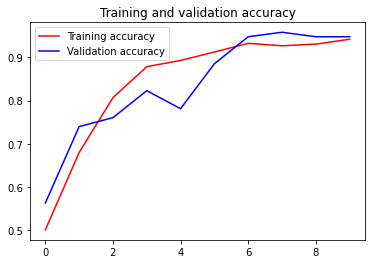

<Figure size 432x288 with 0 Axes>

In [ ]:
# check overfitting / underfitting graph accuracy
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving 02vG75hQW9Vp4oTl.png to 02vG75hQW9Vp4oTl.png
02vG75hQW9Vp4oTl.png
Result : ROCK


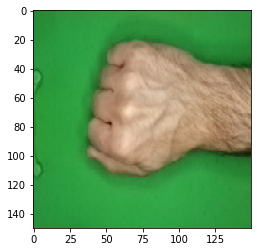

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  #predict image
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  result = model.predict(images, batch_size=64)

  print(fn)
  print(result)

  if result[0][0]==1:
    print('Result : PAPER')
  elif result[0][1]==1:
    print('Result : ROCK')
  elif result[0][2]==1:
     print('Result : SCISSORS')